In [2]:
!pip install autokeras

Defaulting to user installation because normal site-packages is not writeable


In [4]:
!pip show autokeras

Name: autokeras
Version: 1.0.20
Summary: AutoML for deep learning
Home-page: http://autokeras.com
Author: DATA Lab, Keras Team
Author-email: jhfjhfj1@gmail.com
License: Apache License 2.0
Location: c:\users\mwyszynski\appdata\roaming\python\python310\site-packages
Requires: keras-tuner, packaging, pandas, tensorflow
Required-by: 


In [15]:
import pandas as pd
import tensorflow as tf
import teller as tr
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from autokeras import StructuredDataRegressor
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import seaborn as sns
import missingno as msno
import numpy as np

import autokeras as ak

In [6]:
import pandas as pd
df_p = pd.read_parquet('100m.parquet', engine='pyarrow')
df_p

,fid,id,name,cropa_aft,crevicea_a,crevicel_l,crossp_pft,ctowerp_pf,ctrlpntp_p,admarea_af,...,przej_ws_1,przej_ws_2,przej_ws_3,przej_ws_4,przej_ws_5,przej_ws_6,przej_ws_7,przej_ws_8,przej_ws_9,geometry
0,1.0,7515927,None,0.0,0.0,0.0,0.0,0.0,0.0,10004.043152,...,0.770394,-1.0,0.111801,0.983850,0.843433,1.0,-1.0,0.958834,0.469788,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00...
1,2.0,7515929,None,0.0,0.0,0.0,0.0,0.0,0.0,10004.058116,...,0.418342,-1.0,0.180419,0.276239,0.831914,1.0,-1.0,1.000000,-0.798214,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00...
2,3.0,7922649,None,0.0,0.0,0.0,0.0,0.0,0.0,9968.171990,...,0.635198,-1.0,0.190709,0.657922,0.883413,1.0,-1.0,1.000000,-0.114583,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00...
3,4.0,7515930,None,0.0,0.0,0.0,0.0,0.0,0.0,10004.065605,...,0.403380,-1.0,0.111801,0.276238,0.854727,1.0,-1.0,1.000000,-0.800000,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00...
4,5.0,7922652,None,0.0,0.0,0.0,0.0,0.0,0.0,9968.190629,...,0.554731,-1.0,0.111801,0.697345,0.892642,1.0,-1.0,0.753210,-0.052822,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295767,295768.0,7958574,None,0.0,0.0,0.0,0.0,0.0,0.0,9964.399978,...,0.396502,-1.0,0.111801,0.279108,0.804592,1.0,-1.0,1.000000,-0.800000,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00...
295768,295769.0,7959569,None,0.0,0.0,0.0,0.0,0.0,0.0,9961.384246,...,0.362713,-1.0,0.111801,0.279326,0.835093,1.0,-1.0,0.883670,-0.929126,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00...
295769,295770.0,7959588,None,0.0,0.0,0.0,0.0,0.0,0.0,9961.457933,...,0.409485,-1.0,0.111801,0.279321,0.887256,1.0,-1.0,1.000000,-0.800000,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00...
295770,295771.0,7962660,None,0.0,0.0,0.0,0.0,0.0,0.0,9961.393478,...,0.173030,-1.0,0.156469,0.008991,0.851548,1.0,-1.0,0.538594,-1.611154,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00...


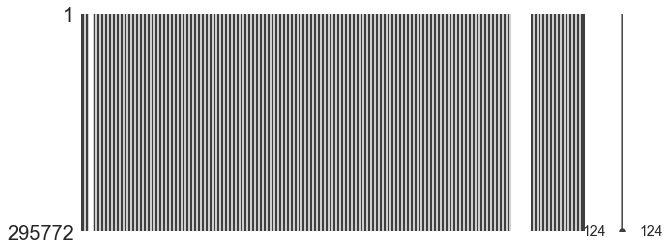

In [7]:
df_p = df_p.loc[:, (df_p != 0).any(axis=0)] #wycinanie pustych kolumn
msno.matrix(df_p, figsize=(10,4)) # test pustych wierszy
df_p =df_p.fillna(0) # wypełnianie Nan zerami

In [ ]:
df_p.describe().transpose()

In [9]:
df_p.head()

,fid,id,name,crossp_pft,ctrlpntp_p,admarea_af,admbndl_lf,airportp_p,athlflda_a,bamboop_pf,...,przej_ws_1,przej_ws_2,przej_ws_3,przej_ws_4,przej_ws_5,przej_ws_6,przej_ws_7,przej_ws_8,przej_ws_9,geometry
0,1.0,7515927,0,0.0,0.0,10004.043152,0.0,0.0,0.0,0.0,...,0.770394,-1.0,0.111801,0.983850,0.843433,1.0,-1.0,0.958834,0.469788,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00...
1,2.0,7515929,0,0.0,0.0,10004.058116,0.0,0.0,0.0,0.0,...,0.418342,-1.0,0.180419,0.276239,0.831914,1.0,-1.0,1.000000,-0.798214,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00...
2,3.0,7922649,0,0.0,0.0,9968.171990,0.0,0.0,0.0,0.0,...,0.635198,-1.0,0.190709,0.657922,0.883413,1.0,-1.0,1.000000,-0.114583,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00...
3,4.0,7515930,0,0.0,0.0,10004.065605,0.0,0.0,0.0,0.0,...,0.403380,-1.0,0.111801,0.276238,0.854727,1.0,-1.0,1.000000,-0.800000,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00...
4,5.0,7922652,0,0.0,0.0,9968.190629,0.0,0.0,0.0,0.0,...,0.554731,-1.0,0.111801,0.697345,0.892642,1.0,-1.0,0.753210,-0.052822,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00...


In [10]:
df_p.shape

(295772, 130)

In [11]:
df_p.columns.to_list()[:-11]

['fid',
 'id',
 'name',
 'crossp_pft',
 'ctrlpntp_p',
 'admarea_af',
 'admbndl_lf',
 'airportp_p',
 'athlflda_a',
 'bamboop_pf',
 'beachl_lft',
 'bluffl_lft',
 'bndmontp_p',
 'boulderp_p',
 'bridgec_pf',
 'bridgel_lf',
 'buildnga_a',
 'buildngp_p',
 'cultxt_pft',
 'builtupa_a',
 'cairnp_pft',
 'campsita_a',
 'cartracl_l',
 'cemetrya_a',
 'cemetryp_p',
 'chimneyp_p',
 'cisternp_p',
 'clearwa_af',
 'clearwl_lf',
 'commbldp_p',
 'commtwrp_p',
 'contourl_l',
 'curflowp_p',
 'cutl_lft',
 'damc_pft',
 'depota_aft',
 'depressl_l',
 'depressp_p',
 'depthcl_lf',
 'disposa_af',
 'ditchl_lft',
 'drditchl_l',
 'elevp_pft',
 'embankl_lf',
 'farmp_pft',
 'fencel_lft',
 'firernga_a',
 'fishfrma_a',
 'fordc_pft',
 'foresta_af',
 'forestl_lf',
 'forestp_pf',
 'grassa_aft',
 'grdelema_a',
 'gullyl_lft',
 'hedgel_lft',
 'hutp_pft',
 'hydrotxt_p',
 'inlandp_pf',
 'islanda_af',
 'lakea_aft',
 'landsldp_p',
 'monumntp_p',
 'orchara_af',
 'parka_aft',
 'phystxt_pf',
 'piera_aft',
 'pita_aft',
 'pitp_pft',
 '

In [12]:
#normalizacja
X = df_p.iloc[:,:-12]
X = MinMaxScaler().fit_transform(X)
y = df_p['przej_wsp_']
X.shape, y.shape

((295772, 118), (295772,))

In [13]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, random_state=42, test_size=.2)

In [14]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((236617, 118), (59155, 118), (236617,), (59155,))

In [ ]:
reg = ak.StructuredDataRegressor(
    overwrite=True, max_trials=10, loss='mae'
)
result = reg.fit(
    X_train,
    y_train,
    epochs=30,
    validation_split=.2
)

Trial 5 Complete [00h 23m 03s]
val_loss: 0.01152543630450964

Best val_loss So Far: 0.01152543630450964
Total elapsed time: 01h 35m 51s

Search: Running Trial #6

Value             |Best Value So Far |Hyperparameter
True              |True              |structured_data_block_1/normalize
False             |False             |structured_data_block_1/dense_block_1/use_batchnorm
3                 |3                 |structured_data_block_1/dense_block_1/num_layers
32                |32                |structured_data_block_1/dense_block_1/units_0
0                 |0                 |structured_data_block_1/dense_block_1/dropout
16                |32                |structured_data_block_1/dense_block_1/units_1
0                 |0                 |regression_head_1/dropout
adam              |adam              |optimizer
0.001             |0.001             |learning_rate
32                |32                |structured_data_block_1/dense_block_1/units_2



In [ ]:
df1 = pd.DataFrame(result.history)
df1.plot()

In [ ]:
# Predict with the best model.
predicted_y = reg.predict(X_test)
# Evaluate the best model with testing data.
loss, acc = reg.evaluate(X_test, y_test)
loss, acc

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
df1 = pd.DataFrame(result.history)

In [ ]:
model = reg.export_model()
model.summary()

In [ ]:
loss, acc = model.evaluate(X_test,y_test, verbose=0)
loss, acc

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
!pip install visualkeras

In [ ]:
import visualkeras
from tensorflow.keras import layers
from collections import defaultdict
color_map = defaultdict(dict) #customize the colours
color_map[layers.Conv2D]['fill'] = '#00f5d4'
color_map[layers.MaxPooling2D]['fill'] = '#8338ec'
color_map[layers.Dropout]['fill'] = '#03045e'
color_map[layers.Dense]['fill'] = '#fb5607'
color_map[layers.Flatten]['fill'] = '#ffbe0b'
visualkeras.layered_view(model, legend=True, color_map=color_map)

In [ ]:
# visualkeras.layered_view(model, legend=True) # without custom font
from PIL import ImageFont
visualkeras.layered_view(model, legend=True,draw_volume=True,spacing=30) # selected font